<a href="https://colab.research.google.com/github/yunju-1118/EWHA/blob/2025-1-Statistical-Methods-for-Big-Data-Analysis/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem1. Regression**
- 다음은 regression 에 대한 문제이다. 이용하는 데이터의 이름은 “regression_data”이며, 사이버
캠퍼스에서 받을 수 있다. 데이터의 dimension은 (731, 10)으로 이는 731개의 observation이 있
으며 1개의 target column과 9개의 feature column으로 구성되었음을 의미한다. 이 데이터는 bike sharing에 관한 데이터로 한 시간당 대여된 자전거의 개수에 대한 정보를 담고 있다. 따라서,
target column은 cnt이며 나머지 9개의 column은 feature column이다.

- 데이터 변수에 대한 설명은 아래의 url을 참고할 것.
https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset

- random seed 설정에 유의할 것.

### (a) 데이터를 불러온 후 처음 4줄을 출력하시오.

In [182]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [183]:
data_reg = pd.read_csv('regression_data.csv')
print(data_reg.head(4))

   season  yr  mnth  holiday  weekday  weathersit      temp       hum  \
0       1   0     1        0        6           2  0.344167  0.805833   
1       1   0     1        0        0           2  0.363478  0.696087   
2       1   0     1        0        1           1  0.196364  0.437273   
3       1   0     1        0        2           1  0.200000  0.590435   

   windspeed   cnt  
0   0.160446   985  
1   0.248539   801  
2   0.248309  1349  
3   0.160296  1562  


### (b) Scatter plot(pair plot)을 그리고 그 결과에 대해서 논하시오.

<Figure size 1000x1000 with 0 Axes>

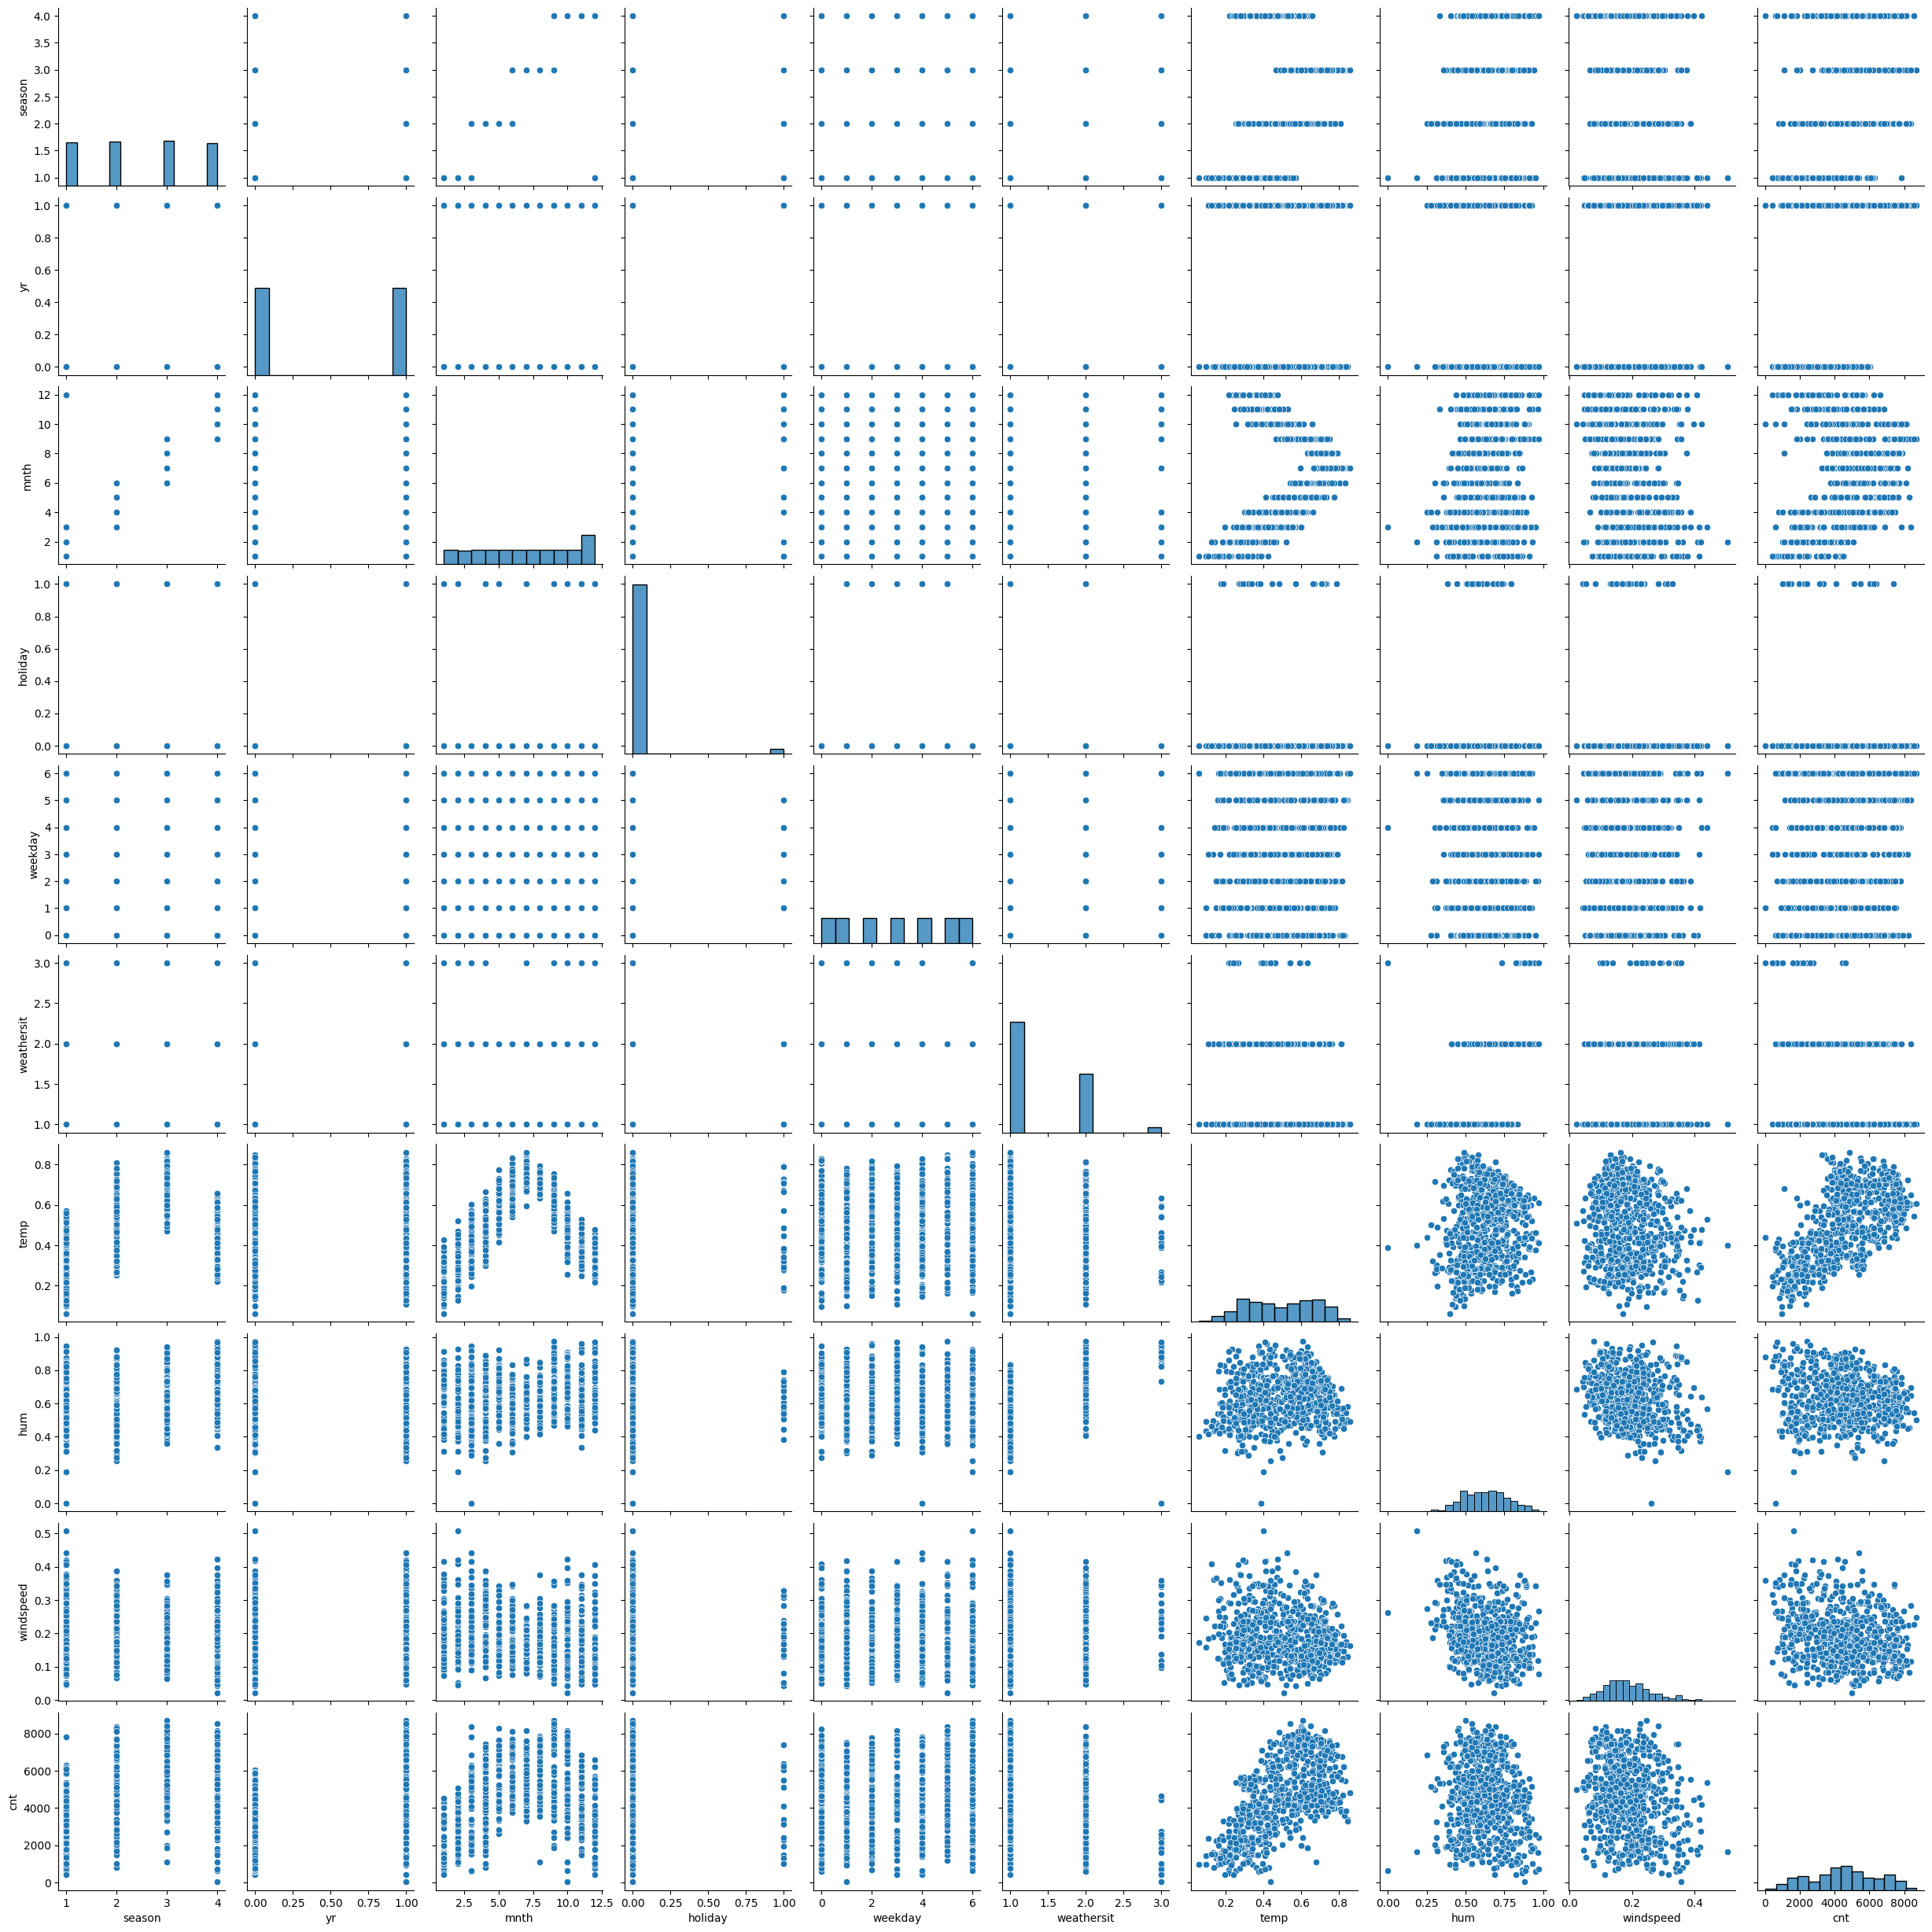

In [184]:
plt.figure(figsize=(10,10))
sns.pairplot(data_reg)
plt.show()

-> 범주형 변수: season, yr, mnth, holiday, weekday, weathersit

### (c) Data를 x(feature), y(target)로 분리하시오.

In [185]:
X = data_reg.drop('cnt', axis=1)
y = data_reg['cnt']

### (d) 필요한 변수에 대하여 one-hot encoding과 label encoding을 하시오.

In [186]:
# one-hot encoding (feature)
X = pd.get_dummies(X, columns = ['season','yr','mnth','holiday','weekday','weathersit'],
                        prefix = ['season','yr','mnth','holiday','weekday','weathersit'],dtype='int')

In [187]:
X.head(3)

,temp,hum,windspeed,season_1,season_2,season_3,season_4,yr_0,yr_1,mnth_1,...,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3
0,0.344167,0.805833,0.160446,1,0,0,0,1,0,1,...,0,0,0,0,0,0,1,0,1,0
1,0.363478,0.696087,0.248539,1,0,0,0,1,0,1,...,1,0,0,0,0,0,0,0,1,0
2,0.196364,0.437273,0.248309,1,0,0,0,1,0,1,...,0,1,0,0,0,0,0,1,0,0


In [188]:
# label_encoding (target)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

### (e) Data를 train/test data로 split 하시오.

In [189]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=777)

### (f) MLR, regression tree, Gradient Boosting, XGBoost에 대하여 model fitting 후 다음 표를 작성하시오. (각 model의 hyperparameter 설정을 반드시 지킬 것) -
- regression tree option: max_depth = 3
- Gradient Boosting hyperparameter option: max_depth = 3, n_estimator = 200, learning_rate = 0.1, random_state = 777
- XGBoost hyperparameter option: max_depth = 3, n_estimator = 200, learning_rate = 0.1, random_state = 777

In [190]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [191]:
model_mlr = LinearRegression()
model_dt = DecisionTreeRegressor(max_depth=3)
model_gb = GradientBoostingRegressor(max_depth=3, n_estimators=200, learning_rate=0.1, random_state=777)
model_xgb = XGBRegressor(max_depth=3, n_estimators=200, learning_rate=0.1, random_state=777)

In [192]:
model_mlr.fit(X_train, y_train)

LinearRegression()

In [193]:
y_pred_mlr = model_mlr.predict(X_test)
print('LinearRegression')
print(f'R-squared: {r2_score(y_test, y_pred_mlr)}')
print(f'MSE: {mean_squared_error(y_test, y_pred_mlr)}')

LinearRegression
R-squared: 0.8194593113878833
MSE: 6670.164612142914


In [194]:
model_dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [195]:
y_pred_dt = model_dt.predict(X_test)
print('DecisionTreeRegressor')
print(f'R-squared: {r2_score(y_test, y_pred_dt)}')
print(f'MSE: {mean_squared_error(y_test, y_pred_dt)}')

DecisionTreeRegressor
R-squared: 0.7649427223393085
MSE: 8684.306830398178


In [196]:
model_gb.fit(X_train, y_train)

GradientBoostingRegressor(n_estimators=200, random_state=777)

In [197]:
y_pred_gb = model_gb.predict(X_test)
print('GradientBoosting')
print(f'R-squared: {r2_score(y_test, y_pred_gb)}')
print(f'MSE: {mean_squared_error(y_test, y_pred_gb)}')

GradientBoosting
R-squared: 0.8757389269433089
MSE: 4590.886511740159


In [198]:
model_xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=777, ...)

In [199]:
y_pred_xgb = model_xgb.predict(X_test)
print('XGBRegressor')
print(f'R-squared: {r2_score(y_test, y_pred_xgb)}')
print(f'MSE: {mean_squared_error(y_test, y_pred_xgb)}')

XGBRegressor
R-squared: 0.880654513835907
MSE: 4409.2783203125


### (g) (e)의 결과에 대하여 모델별로 $Y$ vs $\hat{Y}$ plot을 그리시오. (코드와 그림을 함께 첨부할 것.)

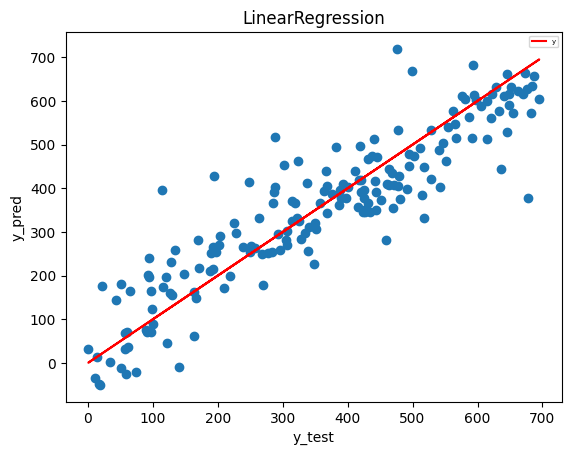

In [200]:
plt.plot(y_test, y_test, color="r")
plt.legend('y=x',fontsize=5)
plt.scatter(y_test, y_pred_mlr)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.title('LinearRegression')
plt.show()

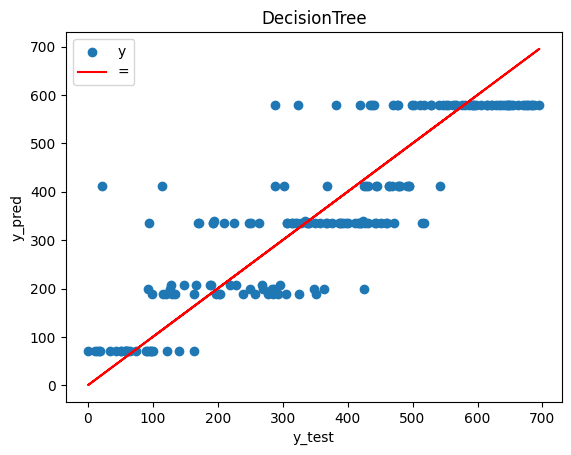

In [201]:
plt.scatter(y_test, y_pred_dt)
plt.plot(y_test, y_test, color="r")
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.title('DecisionTree')
plt.legend('y=x')
plt.show()

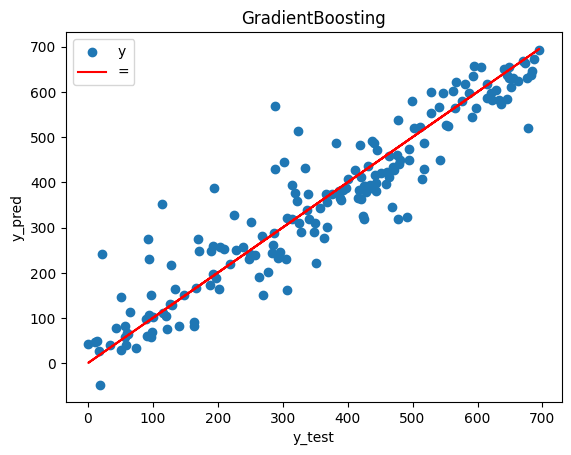

In [202]:
plt.scatter(y_test, y_pred_gb)
plt.plot(y_test, y_test, color="r")
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.title('GradientBoosting')
plt.legend('y=x')
plt.show()

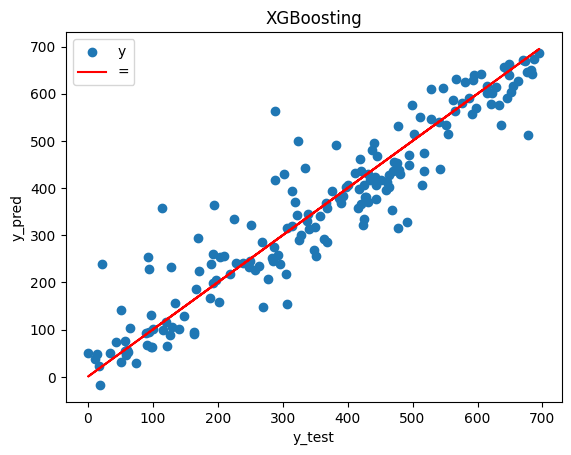

In [203]:
plt.scatter(y_test, y_pred_xgb)
plt.plot(y_test, y_test, color="r")
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.title('XGBoosting')
plt.legend('y=x')
plt.show()

# Problem2. Classification
- 다음은 classification에 관한 문제이다. 이용하는 데이터의 이름은“classification_data”이며, 사이버캠퍼스에서 받을 수 있다. 데이터의 dimension은 (4521, 17)으로 이는 4521개의 observation이 있으며 1개의 target column과 16개의 feature column으로 구성되었음을 의미한다. 이 데이터는 bank diposit에 관한 데이터로 보증금 대출가능 여부에 대한 정보를 담고 있다. Target column은 y이며 보증금 대출이 가능한 경우 “yes”, 불가능한 경우 “no”로 표기되어 있다.
- random seed 설정에 유의할 것.

In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### (a) 데이터를 불러온 후 처음 4줄을 출력하시오.

In [205]:
data_clf = pd.read_csv('classification_data.csv', sep=";")

In [206]:
data_clf.head(4)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no


In [207]:
data_clf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [208]:
data_clf.shape

(4521, 17)

In [209]:
data_clf.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


### (b) Categorical variable에 대해 histogram을 그리고 그 결과에 대해 논하시오.

<Axes: xlabel='job', ylabel='count'>

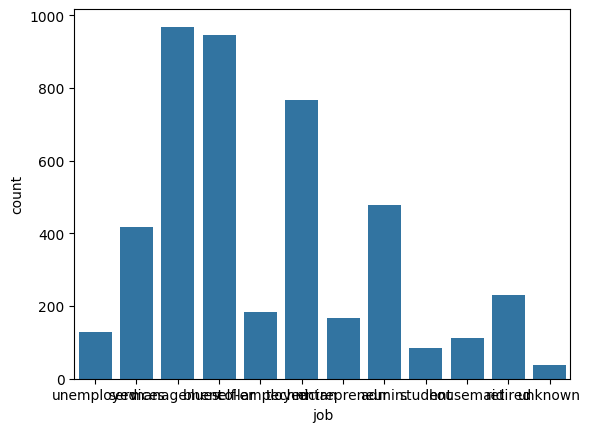

In [210]:
sns.countplot(data=data_clf, x=data_clf['job'])

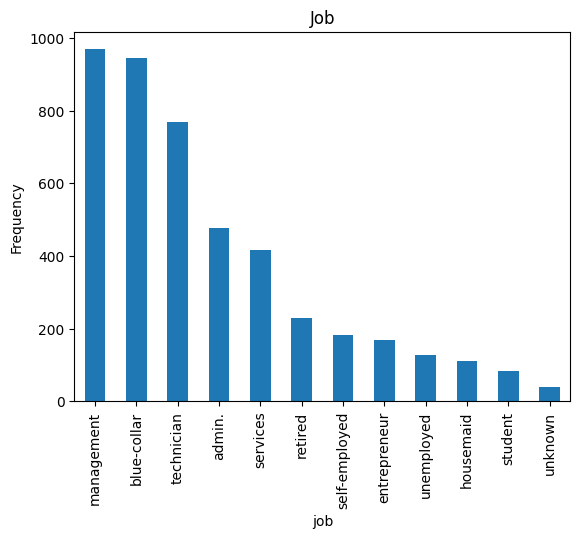

In [211]:
data_clf['job'].value_counts().plot(kind='bar')
plt.title('Job')
plt.ylabel('Frequency')
plt.show()

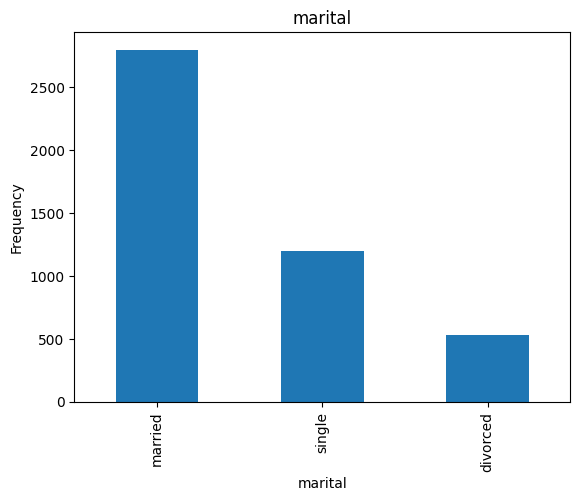

In [212]:
data_clf['marital'].value_counts().plot(kind='bar')
plt.title('marital')
plt.ylabel('Frequency')
plt.show()

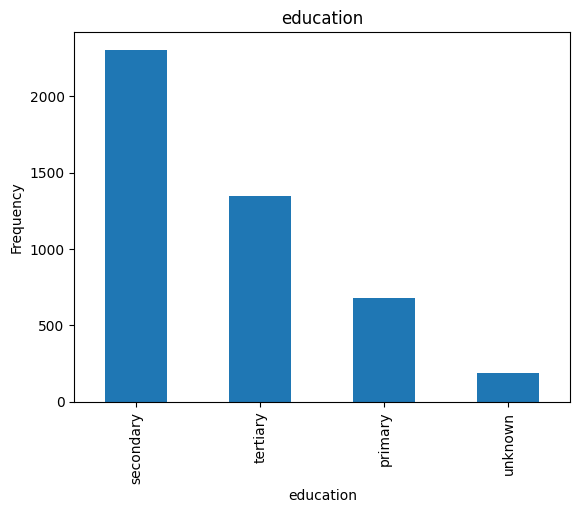

In [213]:
data_clf['education'].value_counts().plot(kind='bar')
plt.title('education')
plt.ylabel('Frequency')
plt.show()

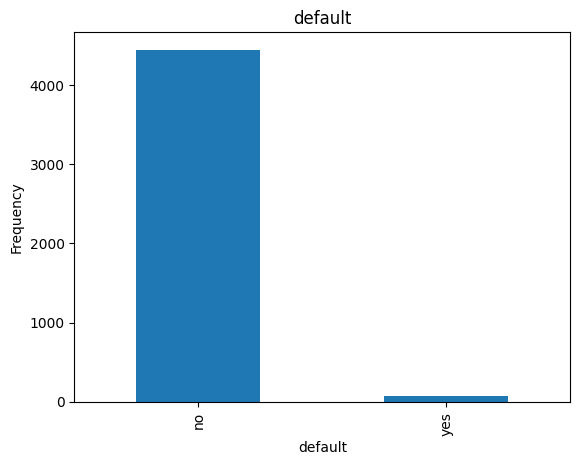

In [214]:
data_clf['default'].value_counts().plot(kind='bar')
plt.title('default')
plt.ylabel('Frequency')
plt.show()

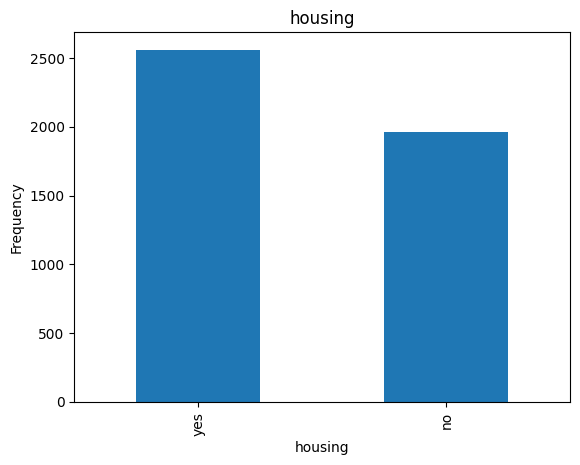

In [215]:
data_clf['housing'].value_counts().plot(kind='bar')
plt.title('housing')
plt.ylabel('Frequency')
plt.show()

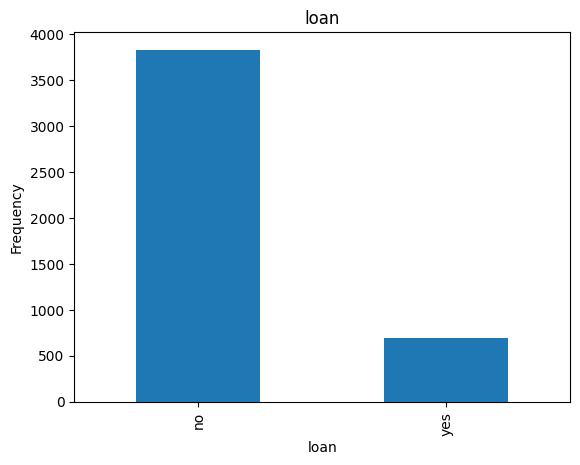

In [216]:
data_clf['loan'].value_counts().plot(kind='bar')
plt.title('loan')
plt.ylabel('Frequency')
plt.show()

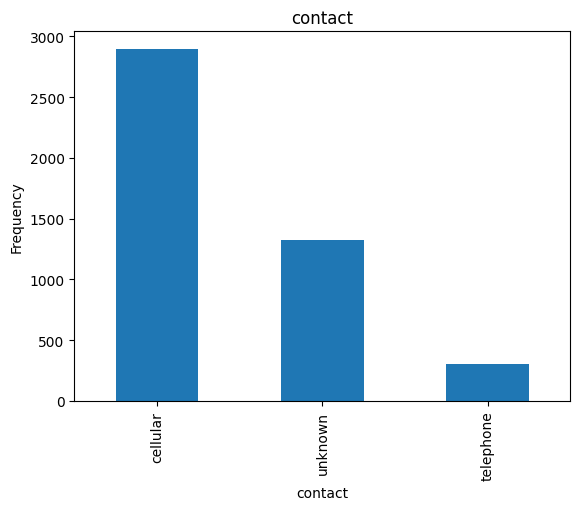

In [217]:
data_clf['contact'].value_counts().plot(kind='bar')
plt.title('contact')
plt.ylabel('Frequency')
plt.show()

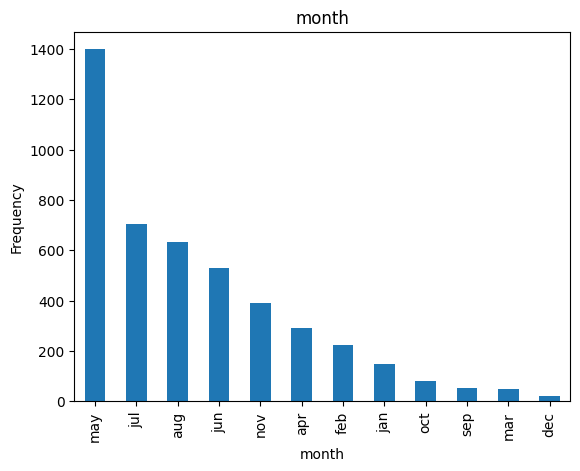

In [218]:
data_clf['month'].value_counts().plot(kind='bar')
plt.title('month')
plt.ylabel('Frequency')
plt.show()

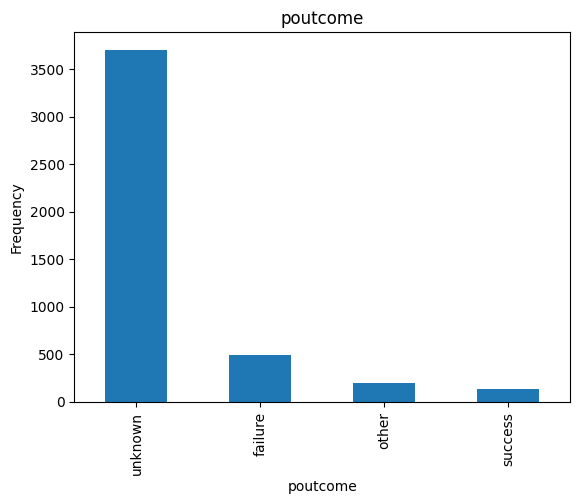

In [219]:
data_clf['poutcome'].value_counts().plot(kind='bar')
plt.title('poutcome')
plt.ylabel('Frequency')
plt.show()

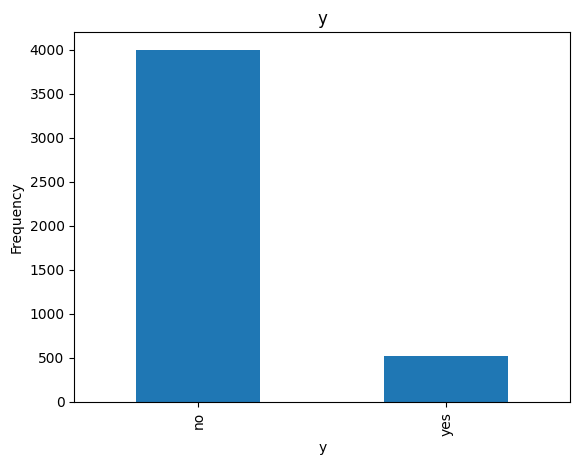

In [220]:
data_clf['y'].value_counts().plot(kind='bar')
plt.title('y')
plt.ylabel('Frequency')
plt.show()

### (c) Data를 X(feature), y(target)으로 분리하시오.

In [221]:
# Feature / target split
X = data_clf.drop('y', axis=1)
y = data_clf['y']

### (d) 필요한 변수에 대하여 one-hot encoding과 label encoding을 하시오.

In [222]:
# one-hot encoding(feature)
X = pd.get_dummies(X, columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'],
                   prefix = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'], dtype='int')

In [223]:
# label encoding (target)
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(y)

### (e) Data를 train/test로 split 하시오. (train:test = 3:1, random_seed = 777)

In [224]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=777)

### (f) Decision tree, Gradient Boosting, XGBoost, Bagging, Random Forest에 대하여 model fitting 후 다음 표를 작성하시오.
- max_depth = 3, n_estimators = 200, learning_rate = 0.1, random_state = 777

In [225]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

In [226]:
model_dt = DecisionTreeClassifier(max_depth = 3, random_state = 777 )
model_gb = GradientBoostingClassifier(n_estimators = 200, learning_rate = 0.1, random_state = 777 )
model_xgb = XGBClassifier(max_depth = 3, n_estimators = 200, learning_rate = 0.1, random_state = 777 )
model_bag = BaggingClassifier(n_estimators = 200, random_state = 777 )
model_rf = RandomForestClassifier(max_depth = 3, n_estimators = 200, random_state = 777 )

In [227]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [228]:
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=777)

In [229]:
model_gb.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=200, random_state=777)

In [230]:
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=777, ...)

In [231]:
model_bag.fit(X_train, y_train)

BaggingClassifier(n_estimators=200, random_state=777)

In [232]:
model_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=200, random_state=777)

In [233]:
y_pred_dt = model_dt.predict(X_test)
y_pred_gb = model_gb.predict(X_test)
y_pred_xgb = model_xgb.predict(X_test)
y_pred_bag = model_bag.predict(X_test)
y_pred_rf = model_rf.predict(X_test)

In [234]:
print('decision tree')
print(f'{confusion_matrix(y_test, y_pred_dt)}')
print(f'accuracy: {accuracy_score(y_test, y_pred_dt)}')
print('=====================================')
print('Gradient Boosting')
print(f'{confusion_matrix(y_test, y_pred_gb)}')
print(f'accuracy: {accuracy_score(y_test, y_pred_gb)}')
print('=====================================')
print('XGBoosting')
print(f'{confusion_matrix(y_test, y_pred_xgb)}')
print(f'accuracy: {accuracy_score(y_test, y_pred_xgb)}')
print('=====================================')
print('Bagging')
print(f'{confusion_matrix(y_test, y_pred_bag)}')
print(f'accuracy: {accuracy_score(y_test, y_pred_bag)}')
print('=====================================')
print('Random Forest')
print(f'{confusion_matrix(y_test, y_pred_rf)}')
print(f'accuracy: {accuracy_score(y_test, y_pred_rf)}')
print('=====================================')

decision tree
[[978  36]
 [ 75  42]]
accuracy: 0.9018567639257294
Gradient Boosting
[[974  40]
 [ 74  43]]
accuracy: 0.8992042440318302
XGBoosting
[[979  35]
 [ 78  39]]
accuracy: 0.9000884173297966
Bagging
[[966  48]
 [ 74  43]]
accuracy: 0.8921308576480991
Random Forest
[[1014    0]
 [ 117    0]]
accuracy: 0.896551724137931
